# ICT 781 - Day 9

# Object-Oriented Programming II

Last week we were introduced to the concept of creating custom classes in Python. Recall that a class has two key features: **attributes** and **methods**. This week, we'll expand on custom classes and introduce a very important class from the Pandas data analysis package: the Pandas `DataFrame`.

## Creating a Deck of Cards

First, let's recall the Card class from last week.

In [1]:
class Card:
    """ The playing card class for Cribbage. """
    
    def __init__(self, suit, value):
        self.suit = suit
        self.value = value
        
        # Assign card color based on suit.
        if self.suit in ['clubs','spades']:
            self.color = 'black'
        else:
            self.color = 'red'
            
        # Assign numerical value based on face value.
        if self.value in ['K','Q','J']:
            self.numvalue = 10
        else:
            self.numvalue = value
            
    def display(self):
        """ Print out all class attributes. """
        
        print('Card attributes:')
        print('{} of {}.'.format(self.value, self.suit))
        print('Numeric value is {}.\n'.format(self.numvalue))

For our purposes this week, we'll change this class a bit. First, instead of assigning both a value and a numerical value, we'll just use numerical values to identify the cards. For example, a 'Ten' will be a 10, a 'Jack' will be an 11, a 'Queen' will be a 12, and 'King' will be 13. Second, instead of passing in the `suit` argument, we'll **encode** the suits using the encoding scheme:

<table>
    <tr>
        <td> 0 </td>
        <td> $\rightarrow$ </td>
        <td> clubs </td>
    </tr>
    <tr>
        <td> 1 </td>
        <td> $\rightarrow$ </td>
        <td> spades </td>
    </tr>
    <tr>
        <td> 2 </td>
        <td> $\rightarrow$ </td>
        <td> diamonds </td>
    </tr>
    <tr>
        <td> 3 </td>
        <td> $\rightarrow$ </td>
        <td> hearts </td>
    </tr>
</table>

In [3]:
class Card:
    """ The general playing card class. """
    
    # Used in the 'display' method.
#     suitList = ['Clubs','Spades','Diamonds','Hearts']
#     numvalueList = [None,'Ace','2','3','4','5','6','7','8','9','10','Jack','Queen','King']
    
    suit_dict = {0: 'Clubs', 1: 'Spades', 2: 'Diamonds', 3: 'Hearts'}
    numvalue_dict = {key: key for key in range(2,11)}
    numvalue_dict[1] = 'Ace'
    numvalue_dict[11] = 'Jack'
    numvalue_dict[12] = 'Queen'
    numvalue_dict[13] = 'King'
    
    def __init__(self, suit = 0, numvalue = 1):
        self.suit = suit
        self.numvalue = numvalue
        
        # Assign card color based on suit.
        if self.suit < 2:
            self.color = 'black'
        else:
            self.color = 'red'
            
    def display(self):
        """ Print out the numvalue and the suit. """
    
        print('{} of {}'.format(self.numvalue_dict[self.numvalue], self.suit_dict[self.suit]))
    
jack_clubs = Card(suit = 0, numvalue = 11)
jack_clubs.display()

Jack of Clubs


Last week we created a deck of 52 cards by using a list comprehension. This solved the problem of creating a deck of cards, but now we'll look at the same task from a new perspective. We'll create a Deck class. At first this may seem redundant, but it should become clear why a class is a good container for a Deck of Cards.

In [8]:
class Deck:
    """ Deck class for containing cards. """
    def __init__(self):
        import itertools
        
        self.cards = [Card(suit, value) for suit, value in itertools.product(range(4), range(1,14))]

In [9]:
deck = Deck()
for card in deck.cards:
    card.display()

Ace of Clubs
2 of Clubs
3 of Clubs
4 of Clubs
5 of Clubs
6 of Clubs
7 of Clubs
8 of Clubs
9 of Clubs
10 of Clubs
Jack of Clubs
Queen of Clubs
King of Clubs
Ace of Spades
2 of Spades
3 of Spades
4 of Spades
5 of Spades
6 of Spades
7 of Spades
8 of Spades
9 of Spades
10 of Spades
Jack of Spades
Queen of Spades
King of Spades
Ace of Diamonds
2 of Diamonds
3 of Diamonds
4 of Diamonds
5 of Diamonds
6 of Diamonds
7 of Diamonds
8 of Diamonds
9 of Diamonds
10 of Diamonds
Jack of Diamonds
Queen of Diamonds
King of Diamonds
Ace of Hearts
2 of Hearts
3 of Hearts
4 of Hearts
5 of Hearts
6 of Hearts
7 of Hearts
8 of Hearts
9 of Hearts
10 of Hearts
Jack of Hearts
Queen of Hearts
King of Hearts


## Shuffling the Deck

You can see that our Deck is created and organized just like a deck of cards you would get from the store. Each suit is arranged in order by value. Usually when we play a game with cards, we need the Deck to be shuffled. Therefore, we'll define a `shuffle` method.

In [16]:
class Deck:
    """ Deck class for containing cards. """
    
    def __init__(self):
        import itertools
        
        self.cards = [Card(suit, value) for suit, value in itertools.product(range(4), range(1,14))]
        
    def print_deck(self):
        """ Method to print the contents of the Deck. """
        for card in self.cards:
            card.display()
            
    def shuffle(self):
        """ Shuffle the cards in the Deck. """
        import random
        
        return random.shuffle(self.cards)

In [18]:
deck = Deck()

# Try to shuffle the cards
deck.shuffle()

# See if the cards are shuffled
deck.print_deck()

7 of Clubs
10 of Hearts
5 of Clubs
King of Hearts
Queen of Diamonds
Queen of Spades
10 of Diamonds
3 of Spades
4 of Hearts
King of Spades
King of Clubs
3 of Hearts
Ace of Diamonds
4 of Diamonds
2 of Diamonds
10 of Clubs
6 of Hearts
2 of Spades
Jack of Spades
King of Diamonds
4 of Clubs
3 of Diamonds
2 of Clubs
8 of Diamonds
Queen of Clubs
2 of Hearts
7 of Hearts
Jack of Diamonds
Ace of Spades
9 of Hearts
Jack of Clubs
8 of Spades
5 of Diamonds
9 of Clubs
4 of Spades
8 of Hearts
Queen of Hearts
Ace of Hearts
7 of Spades
8 of Clubs
Jack of Hearts
10 of Spades
9 of Spades
5 of Hearts
6 of Diamonds
3 of Clubs
7 of Diamonds
6 of Clubs
5 of Spades
9 of Diamonds
Ace of Clubs
6 of Spades


## Removing Cards from the Deck

In any card game, the cards are all taken from the same deck. Therefore, we'll define a method that removes a specified card from the list of Cards contained in the Deck.

In [19]:
class Deck:
    """ Deck class for containing cards. """
    
    def __init__(self):
        import itertools
        
        self.cards = [Card(suit, value) for suit, value in itertools.product(range(4), range(1,14))]
        
    def print_deck(self):
        """ Method to print the contents of the Deck. """
        for card in self.cards:
            card.display()
            
    def shuffle(self):
        """ Shuffle the cards in the Deck. """
        import random
        
        return random.shuffle(self.cards)
    
    def remove_card(self, card):
        """ Remove the given card from the Deck. """
        
        if card in self.cards:
            self.cards.remove(card)

In [21]:
deck = Deck()

jack_of_clubs = Card(suit = 0, numvalue = 11)

deck.remove_card(jack_of_clubs)
deck.print_deck()

Ace of Clubs
2 of Clubs
3 of Clubs
4 of Clubs
5 of Clubs
6 of Clubs
7 of Clubs
8 of Clubs
9 of Clubs
10 of Clubs
Jack of Clubs
Queen of Clubs
King of Clubs
Ace of Spades
2 of Spades
3 of Spades
4 of Spades
5 of Spades
6 of Spades
7 of Spades
8 of Spades
9 of Spades
10 of Spades
Jack of Spades
Queen of Spades
King of Spades
Ace of Diamonds
2 of Diamonds
3 of Diamonds
4 of Diamonds
5 of Diamonds
6 of Diamonds
7 of Diamonds
8 of Diamonds
9 of Diamonds
10 of Diamonds
Jack of Diamonds
Queen of Diamonds
King of Diamonds
Ace of Hearts
2 of Hearts
3 of Hearts
4 of Hearts
5 of Hearts
6 of Hearts
7 of Hearts
8 of Hearts
9 of Hearts
10 of Hearts
Jack of Hearts
Queen of Hearts
King of Hearts


This seemingly simple task has one wrinkle: it won't remove cards properly! In line 23, when we make the comparison `if card in self.cards()`, the Python interpreter uses the keyword `in` to determine if the `card` object is the self-same object in the Deck. 

This comparison needs to be understood before we go on to correct the problem. Let's review what happens when we call the `remove_card` method. We pass in the argument `Card(...)` with its suit and value. The method `remove_card` then compares our passed-in argument to all of the cards in the Deck. However, `remove_card` doesn't just check if the attributes are the same, but if the card we passed in **is** an object in the Deck. This is called a **deep comparison**. Therefore, `remove_card` will always return `False`, since we are asking it to find our newly created `Card(...)` argument in a list of previously created cards, which is impossible.

To get around this problem, we need to do something technical.

### Operator Overloading

We are going to tell the Python interpreter exactly how to check if two cards are equal. This means that we will be changing the meaning of the relational operator `==`. When we change the default behaviour of a Python operator, we call it **operator overloading**. We'll define our overloaded operator in a method called `__eq__` (short for equals).

In [1]:
class Card:
    """ The general playing card class. """
    
    # Used in the 'display' method.
#     suitList = ['Clubs','Spades','Diamonds','Hearts']
#     numvalueList = [None,'Ace','2','3','4','5','6','7','8','9','10','Jack','Queen','King']
    
    suit_dict = {0: 'Clubs', 1: 'Spades', 2: 'Diamonds', 3: 'Hearts'}
    numvalue_dict = {key: key for key in range(2,11)}
    numvalue_dict[1] = 'Ace'
    numvalue_dict[11] = 'Jack'
    numvalue_dict[12] = 'Queen'
    numvalue_dict[13] = 'King'
    
    def __init__(self, suit = 0, numvalue = 1):
        self.suit = suit
        self.numvalue = numvalue
        
        # Assign card color based on suit.
        if self.suit < 2:
            self.color = 'black'
        else:
            self.color = 'red'
    
    def __eq__(self, other):
        """ Compare equality of self and other. Two Cards are equal if they have 
            the same suit and the same numvalue.
        """
        if type(other) is not Card: 
            raise TypeError("'==' not implemented between '{}' and '{}'".format(type(self).__name__, type(other).__name__))
        
        if self.suit == other.suit and self.numvalue == other.numvalue:
            return True
        else:
            return False
    
    def display(self):
        """ Print out the numvalue and the suit. """
    
        print('{} of {}'.format(self.numvalue_dict[self.numvalue], self.suit_dict[self.suit]))

In [34]:
c1 = Card(suit = 0, numvalue = 1)
c2 = Card(suit = 0, numvalue = 1)

c1 == c2

True

In [35]:
deck = Deck()

ace_clubs = Card()
deck.remove_card(ace_clubs)

deck.print_deck()

2 of Clubs
3 of Clubs
4 of Clubs
5 of Clubs
6 of Clubs
7 of Clubs
8 of Clubs
9 of Clubs
10 of Clubs
Jack of Clubs
Queen of Clubs
King of Clubs
Ace of Spades
2 of Spades
3 of Spades
4 of Spades
5 of Spades
6 of Spades
7 of Spades
8 of Spades
9 of Spades
10 of Spades
Jack of Spades
Queen of Spades
King of Spades
Ace of Diamonds
2 of Diamonds
3 of Diamonds
4 of Diamonds
5 of Diamonds
6 of Diamonds
7 of Diamonds
8 of Diamonds
9 of Diamonds
10 of Diamonds
Jack of Diamonds
Queen of Diamonds
King of Diamonds
Ace of Hearts
2 of Hearts
3 of Hearts
4 of Hearts
5 of Hearts
6 of Hearts
7 of Hearts
8 of Hearts
9 of Hearts
10 of Hearts
Jack of Hearts
Queen of Hearts
King of Hearts


From the output, we see that the Ace of Clubs is now gone from the Deck. 

We also want to be able to remove the top card from the Deck. We'll add another method called `draw` to accomplish this. We'll also add a method called `is_empty` to tell us when then are no more cards in the Deck.

We'll test the `draw` method by drawing 26 cards from the top of the deck.

In [53]:
class Deck:
    """ Deck class for containing cards. """
    
    def __init__(self):
        import itertools
        
        self.cards = [Card(suit, value) for suit, value in itertools.product(range(4), range(1,14))]
        
    def print_deck(self):
        """ Method to print the contents of the Deck. """
        for card in self.cards:
            card.display()
            
    def shuffle(self):
        """ Shuffle the cards in the Deck. """
        import random
        
        return random.shuffle(self.cards)
    
    def remove_card(self, card):
        """ Remove the given card from the Deck. """
        
        if card in self.cards:
            self.cards.remove(card)
            
    def is_empty(self):
        """ Determine if there are Cards left in the Deck. """
        
        if len(self.cards) is 0:
            return True
        else:
            return False
    
    def draw(self, num_card = 1):
        """ Draw num_card Cards from the top of the Deck. """
        
        return [self.cards.pop() for i in range(num_card) if not self.is_empty()]
    
    def random_draw(self, num_card = 1):
        """ Draw a number of random Cards from the Deck. """
        import random
        
        result = random.sample(self.cards, num_card)
        
        for card in result:
            self.remove_card(card)
            
        return result

In [54]:
deck = Deck()

deck.draw(14)

deck.print_deck()

Ace of Clubs
2 of Clubs
3 of Clubs
4 of Clubs
5 of Clubs
6 of Clubs
7 of Clubs
8 of Clubs
9 of Clubs
10 of Clubs
Jack of Clubs
Queen of Clubs
King of Clubs
Ace of Spades
2 of Spades
3 of Spades
4 of Spades
5 of Spades
6 of Spades
7 of Spades
8 of Spades
9 of Spades
10 of Spades
Jack of Spades
Queen of Spades
King of Spades
Ace of Diamonds
2 of Diamonds
3 of Diamonds
4 of Diamonds
5 of Diamonds
6 of Diamonds
7 of Diamonds
8 of Diamonds
9 of Diamonds
10 of Diamonds
Jack of Diamonds
Queen of Diamonds


In [55]:
cards1 = deck.random_draw(5)

for card in cards1:
    card.display()

3 of Diamonds
9 of Diamonds
Jack of Spades
King of Spades
9 of Spades


In [56]:
deck.print_deck()

Ace of Clubs
2 of Clubs
3 of Clubs
4 of Clubs
5 of Clubs
6 of Clubs
7 of Clubs
8 of Clubs
9 of Clubs
10 of Clubs
Jack of Clubs
Queen of Clubs
King of Clubs
Ace of Spades
2 of Spades
3 of Spades
4 of Spades
5 of Spades
6 of Spades
7 of Spades
8 of Spades
10 of Spades
Queen of Spades
Ace of Diamonds
2 of Diamonds
4 of Diamonds
5 of Diamonds
6 of Diamonds
7 of Diamonds
8 of Diamonds
10 of Diamonds
Jack of Diamonds
Queen of Diamonds


## Object Inheritance

This is our last topic in the dedicated study of objects. For most card games, players take cards from the deck into their own 'hand'. A hand is like a deck, but it has a limited number of cards. For example, in Cribbage, each player starts with 6 cards. In this section, we'll define the `Hand` class and add a `deal` method to the `Deck` class.

Since each player's hand is like a deck, we'll define the `Hand` class as a **child** class of the `Deck` class (the **parent** class). Each hand will have two attributes: cards and name (the player's name).

In [57]:
class Deck:
    """ Deck class for containing cards. """
    
    def __init__(self):
        import itertools
        
        self.cards = [Card(suit, value) for suit, value in itertools.product(range(4), range(1,14))]
        
    def print_deck(self):
        """ Method to print the contents of the Deck. """
        for card in self.cards:
            card.display()
            
    def shuffle(self):
        """ Shuffle the cards in the Deck. """
        import random
        
        return random.shuffle(self.cards)
    
    def remove_card(self, card):
        """ Remove the given card from the Deck. """
        
        if card in self.cards:
            self.cards.remove(card)
            
    def is_empty(self):
        """ Determine if there are Cards left in the Deck. """
        
        if len(self.cards) is 0:
            return True
        else:
            return False
    
    def draw(self, num_card = 1):
        """ Draw num_card Cards from the top of the Deck. """
        
        return [self.cards.pop() for i in range(num_card) if not self.is_empty()]
    
    def random_draw(self, num_card = 1):
        """ Draw a number of random Cards from the Deck. """
        import random
        
        result = random.sample(self.cards, num_card)
        
        for card in result:
            self.remove_card(card)
            
        return result

class Hand(Deck):
    """ Class to represent a player's hand. """
    
    def __init__(self, name = 'Jane Doe', cards = []):
        self.name = name
        self.cards = cards

The `Hand` class will need methods to add and remove cards from itself. Luckily, since `Hand` is a child class or **sub-class** of `Deck`, it **inherits** the methods of the parent class. Therefore, `remove_card` and `pop_card` are already defined. We just need to define the `add_card` method.

In [65]:
class Hand(Deck):
    """ Class to represent a player's hand. """
    
    def __init__(self, name = 'Jane Doe', cards = []):
        self.name = name
        self.cards = cards
        
    def add_card(self, card):
        """ Add the card to Hand. """
        
        self.cards.append(card)
        
    def display(self):
        """ Display all cards in the Hand. """
        
        for card in self.cards:
            card.display()
        print()

Now we'll define the `deal` method for the `Deck` class. We're adding this method to the `Deck` class since it is unlikely that we will need to deal out cards from a player's Hand. The `deal` method will have two arguments: a list of Hand names and the number of cards to be dealt to each Hand.

We'll create a list of players, then deal out 7 cards to each player and display each player's hand.

In [16]:
class Deck:
    """ Deck class for containing cards. """
    
    def __init__(self):
        import itertools
        
        self.cards = [Card(suit, value) for suit, value in itertools.product(range(4), range(1,14))]
        
    def print_deck(self):
        """ Method to print the contents of the Deck. """
        for card in self.cards:
            card.display()
            
    def shuffle(self):
        """ Shuffle the cards in the Deck. """
        import random
        
        return random.shuffle(self.cards)
    
    def remove_card(self, card):
        """ Remove the given card from the Deck. """
        
        if card in self.cards:
            self.cards.remove(card)
            
    def is_empty(self):
        """ Determine if there are Cards left in the Deck. """
        
        if len(self.cards) is 0:
            return True
        else:
            return False
    
    def draw(self, num_card = 1):
        """ Draw num_card Cards from the top of the Deck. """
        
        return [self.cards.pop() for i in range(num_card) if not self.is_empty()]
    
    def random_draw(self, num_card = 1):
        """ Draw a number of random Cards from the Deck. """
        import random
        
        result = random.sample(self.cards, num_card)
        
        for card in result:
            self.remove_card(card)
            
        return result
    
    def deal(self, hands, cards_per_hand = 5):
        """ Deals cards_per_hand to the list of Hands contained in hands. """
        
        if len(hands)*cards_per_hand > len(self.cards):
            max_cards = len(self.cards) // len(hands)
            raise ValueError('You asked for too many cards ({}). The maximum possible cards per hand is {}.'.format(len(hands)*cards_per_hand,max_cards))
        
        for hand in hands:
            for card in self.random_draw(cards_per_hand):
                hand.add_card(card)
            
class Hand(Deck):
    """ Class to represent a player's hand. """
    
    def __init__(self, name = 'Jane Doe'):
        self.name = name
        self.cards = []
        
    def add_card(self, card):
        """ Add the card to Hand. """
        
        self.cards.append(card)
        
    def display(self):
        """ Display all cards in the Hand. """
        
        print(self.name)
        
        for card in self.cards:
            card.display()
        print()

In [18]:
players = ['Harry','Larry','Marry','Barry']

hands = [Hand(name) for name in players]

for hand in hands:
    hand.print_deck()

deck = Deck()

for i in range(11):
    deck.draw()

deck.deal(hands, cards_per_hand = 7)

for hand in hands:
    hand.display()
    print()

Harry
10 of Spades
3 of Clubs
2 of Hearts
4 of Clubs
5 of Clubs
2 of Clubs
9 of Clubs


Larry
3 of Diamonds
Ace of Diamonds
9 of Spades
7 of Spades
7 of Clubs
5 of Spades
9 of Diamonds


Marry
2 of Spades
10 of Clubs
Ace of Hearts
6 of Spades
King of Clubs
7 of Diamonds
2 of Diamonds


Barry
Jack of Spades
Ace of Spades
4 of Spades
5 of Diamonds
4 of Diamonds
6 of Clubs
Queen of Diamonds




In [10]:
# Example of an idea to start programming a game.

class Game:
    def __init__(this_game, title, players):
        this_game.title = title
        this_game.deck = Deck()
        this_game.players = [Hand(name) for name in players]
        
    def turn(this_game):
        # Code the rules of a player's turn here.
        pass
    
    def endgame(this_game):
        # Code the endgame condition(s) here.
        pass
    
    def rungame(this_game):
        """ Code the order of play here. """
        this_game.deck.shuffle()
        
        this_game.turn()
        this_game.endgame()
        
game = Game(title = 'Blank Game', players = ['Frank','Joe'])
game.rungame()

In [20]:
# Example of imposing object-oriented programming to your projects.

class Project:
    
    def __init__(self, arg1 = None, arg2 = None):
        self.arg1 = arg1
        self.arg2 = arg2
        
    def run(self):
        # Write your project code here, using the variables defined as 'attributes' in __init__.
        pass
    
project = Project()
project.run()

## A Brief Introduction to Pandas

Pandas is one of the major Python packages for data analysis. We will only touch on the most fundamental feature of Pandas: importing data into Python.

Data is often found in .csv (comma-separated) files. These files are often created by direct data entry into a spreadsheet program. The `books.csv` file is in the same folder as this Jupyter notebook. We'll import the Pandas package and then read the data into Jupyter.

In [21]:
try:
    import pandas as pd
except:
    !pip install --user pandas

import numpy as np 

bookdata = pd.read_csv('books.csv')

That's it! The `books.csv` file is now available for analysis. It has been imported as a `DataFrame` object. However, we would like to see the data to check that the dataset is complete and the import worked as expected.

We can view the `bookdata` object by simply typing `bookdata` in a Jupyter cell.

In [22]:
bookdata

,Title,Author,Genre,Pages,Publisher
0,Fundamentals of Wavelets,"Goswami, Jaideva",signal_processing,228,Wiley
1,Data Smart,"Foreman, John",data_science,235,Wiley
2,God Created the Integers,"Hawking, Stephen",mathematics,197,Penguin
3,Superfreakonomics,"Dubner, Stephen",economics,179,HarperCollins
4,Orientalism,"Said, Edward",history,197,Penguin
...,...,...,...,...,...
206,Structure and Randomness,"Tao, Terence",mathematics,252,NaN
207,Image Processing with MATLAB,"Eddins, Steve",signal_processing,241,NaN
208,Animal Farm,"Orwell, George",fiction,180,NaN
209,"Idiot, The","Dostoevsky, Fyodor",fiction,197,NaN


To only display certain rows, use slicing. We'll display rows 8 through 16.

In [23]:
bookdata[8:16]

,Title,Author,Genre,Pages,Publisher
8,Image Processing & Mathematical Morphology,"Shih, Frank",signal_processing,241,CRC
9,How to Think Like Sherlock Holmes,"Konnikova, Maria",psychology,240,Penguin
10,Data Scientists at Work,Sebastian Gutierrez,data_science,230,Apress
11,Slaughterhouse Five,"Vonnegut, Kurt",fiction,198,Random House
12,Birth of a Theorem,"Villani, Cedric",mathematics,234,Bodley Head
13,Structure & Interpretation of Computer Programs,"Sussman, Gerald",computer_science,240,MIT Press
14,"Age of Wrath, The","Eraly, Abraham",history,238,Penguin
15,"Trial, The","Kafka, Frank",fiction,198,Random House


We can also display specific columns of the dataframe by using a similar technique to accessing dictionary values by key. Instead of specifying a key, we now specify the column name.

In [24]:
# Display all of the book authors.
file_authors = bookdata['Author']
file_authors

0        Goswami, Jaideva
1           Foreman, John
2        Hawking, Stephen
3         Dubner, Stephen
4            Said, Edward
              ...        
206          Tao, Terence
207         Eddins, Steve
208        Orwell, George
209    Dostoevsky, Fyodor
210      Dickens, Charles
Name: Author, Length: 211, dtype: object

In [25]:
# Display all of the book authors AND publishers.
file_authors_and_publishers = bookdata[['Author','Publisher']]
file_authors_and_publishers

,Author,Publisher
0,"Goswami, Jaideva",Wiley
1,"Foreman, John",Wiley
2,"Hawking, Stephen",Penguin
3,"Dubner, Stephen",HarperCollins
4,"Said, Edward",Penguin
...,...,...
206,"Tao, Terence",NaN
207,"Eddins, Steve",NaN
208,"Orwell, George",NaN
209,"Dostoevsky, Fyodor",NaN


From looking at the displayed data, we can see several missing entries, which are represented by 'not a number' or `NaN`. If we want to remove these entries, we may define a new dataset and call the `dropna` method of our `bookdata` object.

The argument of the `dropna` method is specified as `axis = 0`, which means drop any *row* with missing values. If you specify `axis = 1`, you will drop any *column* with missing values.

In [26]:
file_nomissing = bookdata.dropna(axis = 0)
file_nomissing

,Title,Author,Genre,Pages,Publisher
0,Fundamentals of Wavelets,"Goswami, Jaideva",signal_processing,228,Wiley
1,Data Smart,"Foreman, John",data_science,235,Wiley
2,God Created the Integers,"Hawking, Stephen",mathematics,197,Penguin
3,Superfreakonomics,"Dubner, Stephen",economics,179,HarperCollins
4,Orientalism,"Said, Edward",history,197,Penguin
...,...,...,...,...,...
114,Rationality & Freedom,"Sen, Amartya",economics,213,Springer
115,Clash of Civilizations and Remaking of the Wor...,"Huntington, Samuel",history,228,Simon&Schuster
116,Uncommon Wisdom,"Capra, Fritjof",nonfiction,197,Fontana
117,One,"Bach, Richard",nonfiction,172,Dell


Now we'll make a quick histogram of the remaining data by number of pages. In this case, our histogram will plot how many books have total pages within given ranges.

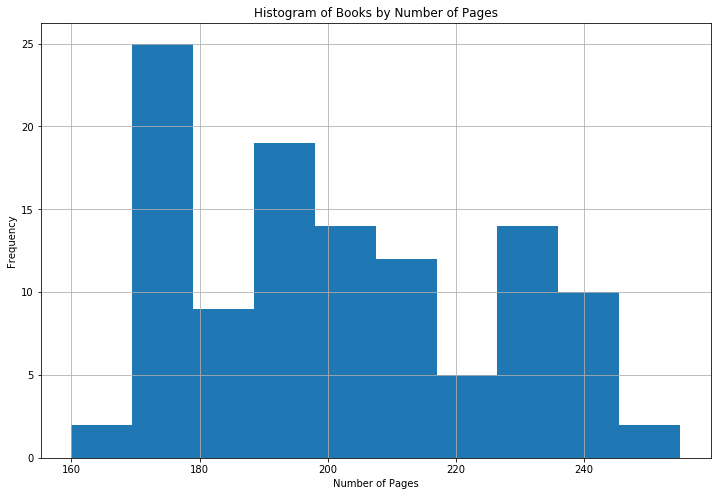

In [27]:
# %matplotlib inline
# The above command is only for Jupyter.

# This line plots the histogram.
ax = file_nomissing.hist(column = 'Pages', figsize = (12,8), bins = 10);

# These lines set the title and axis labels.
ax[0][0].set_title('Histogram of Books by Number of Pages')
ax[0][0].set_xlabel('Number of Pages')
ax[0][0].set_ylabel('Frequency');

## *Exercises*

1. Change the `Card` class so that the 'Ace' card has higher value than the 'King' card.

In [1]:
# We need to change the way a Deck defines its cards list.
class Deck:
    """ Deck class for containing cards. """
    
    def __init__(self):
        import itertools
        
        self.cards = [Card(suit, value) for suit, value in itertools.product(range(4), range(2,15))]
        
    def print_deck(self):
        """ Method to print the contents of the Deck. """
        for card in self.cards:
            card.display()
            
    def shuffle(self):
        """ Shuffle the cards in the Deck. """
        import random
        
        return random.shuffle(self.cards)
    
    def remove_card(self, card):
        """ Remove the given card from the Deck. """
        
        if card in self.cards:
            self.cards.remove(card)
            
    def is_empty(self):
        """ Determine if there are Cards left in the Deck. """
        
        if len(self.cards) is 0:
            return True
        else:
            return False
    
    def draw(self, num_card = 1):
        """ Draw num_card Cards from the top of the Deck. """
        
        return [self.cards.pop() for i in range(num_card) if not self.is_empty()]
    
    def random_draw(self, num_card = 1):
        """ Draw a number of random Cards from the Deck. """
        import random
        
        result = random.sample(self.cards, num_card)
        
        for card in result:
            self.remove_card(card)
            
        return result
    
    def deal(self, hands, cards_per_hand = 5):
        """ Deals cards_per_hand to the list of Hands contained in hands. """
        
        if len(hands)*cards_per_hand > len(self.cards):
            max_cards = len(self.cards) // len(hands)
            raise ValueError('You asked for too many cards ({}). The maximum possible cards per hand is {}.'.format(len(hands)*cards_per_hand,max_cards))
        
        for hand in hands:
            for card in self.random_draw(cards_per_hand):
                hand.add_card(card)

class Card:
    """ The general playing card class. """
    
    # Used in the 'display' method.
    
    suit_dict = {0: 'Clubs', 1: 'Spades', 2: 'Diamonds', 3: 'Hearts'}
    numvalue_dict = {key: key for key in range(2,11)}
    numvalue_dict[14] = 'Ace'
    numvalue_dict[11] = 'Jack'
    numvalue_dict[12] = 'Queen'
    numvalue_dict[13] = 'King'
    
    def __init__(self, suit = 0, numvalue = 2):
        self.suit = suit
        self.numvalue = numvalue
        
        # Assign card color based on suit.
        if self.suit < 2:
            self.color = 'black'
        else:
            self.color = 'red'
    
    def __eq__(self, other):
        """ Compare equality of self and other. Two Cards are equal if they have 
            the same suit and the same numvalue.
        """
        if type(other) is not Card: 
            raise TypeError("'==' not implemented between '{}' and '{}'".format(type(self).__name__, type(other).__name__))
        
        if self.suit == other.suit and self.numvalue == other.numvalue:
            return True
        else:
            return False
        
    def __str__(self):
        """ Overload the print() and str() functions for the Card class. """
        
        return '{} of {}'.format(self.numvalue_dict[self.numvalue], self.suit_dict[self.suit])
    
    def display(self):
        """ Print out the numvalue and the suit. """
    
        print('{} of {}'.format(self.numvalue_dict[self.numvalue], self.suit_dict[self.suit]))
        
# deck = Deck()

# deck.print_deck()

c1 = Card()

print(c1)

2 of Clubs


2. Execute the next cell to see the output from `print(deck)`. Write a method called `__str__` in the Card class that prints out the Card's `numvalue` and `suit`. Your method should take in no arguments and should **return** a string in the specified form. Writing this function is an example of overloading the `__str__` operator. You can see the difference when you use `print(deck)`.

In [2]:
deck = Deck()

print(deck)

In [3]:
class Deck:
    """ Deck class for containing cards. """
    
    def __init__(self):
        import itertools
        
        self.cards = [Card(suit, value) for suit, value in itertools.product(range(4), range(2,15))]
        
    def __str__(self):
        """ Overload the print() function for the Deck class. """
        
        result = ''
        
        for card in self.cards:
            result += str(card)
            
            result += '\n'
            
        return result
        
    def print_deck(self):
        """ Method to print the contents of the Deck. """
        for card in self.cards:
            card.display()
            
    def shuffle(self):
        """ Shuffle the cards in the Deck. """
        import random
        
        return random.shuffle(self.cards)
    
    def remove_card(self, card):
        """ Remove the given card from the Deck. """
        
        if card in self.cards:
            self.cards.remove(card)
            
    def is_empty(self):
        """ Determine if there are Cards left in the Deck. """
        
        if len(self.cards) is 0:
            return True
        else:
            return False
    
    def draw(self, num_card = 1):
        """ Draw num_card Cards from the top of the Deck. """
        
        return [self.cards.pop() for i in range(num_card) if not self.is_empty()]
    
    def random_draw(self, num_card = 1):
        """ Draw a number of random Cards from the Deck. """
        import random
        
        result = random.sample(self.cards, num_card)
        
        for card in result:
            self.remove_card(card)
            
        return result
    
    def deal(self, hands, cards_per_hand = 5):
        """ Deals cards_per_hand to the list of Hands contained in hands. """
        
        if len(hands)*cards_per_hand > len(self.cards):
            max_cards = len(self.cards) // len(hands)
            raise ValueError('You asked for too many cards ({}). The maximum possible cards per hand is {}.'.format(len(hands)*cards_per_hand,max_cards))
        
        for hand in hands:
            for card in self.random_draw(cards_per_hand):
                hand.add_card(card)

In [6]:
deck = Deck()

print(deck)

2 of Clubs
3 of Clubs
4 of Clubs
5 of Clubs
6 of Clubs
7 of Clubs
8 of Clubs
9 of Clubs
10 of Clubs
Jack of Clubs
Queen of Clubs
King of Clubs
Ace of Clubs
2 of Spades
3 of Spades
4 of Spades
5 of Spades
6 of Spades
7 of Spades
8 of Spades
9 of Spades
10 of Spades
Jack of Spades
Queen of Spades
King of Spades
Ace of Spades
2 of Diamonds
3 of Diamonds
4 of Diamonds
5 of Diamonds
6 of Diamonds
7 of Diamonds
8 of Diamonds
9 of Diamonds
10 of Diamonds
Jack of Diamonds
Queen of Diamonds
King of Diamonds
Ace of Diamonds
2 of Hearts
3 of Hearts
4 of Hearts
5 of Hearts
6 of Hearts
7 of Hearts
8 of Hearts
9 of Hearts
10 of Hearts
Jack of Hearts
Queen of Hearts
King of Hearts
Ace of Hearts



3. Write a `__str__` method for the `Hand` class that displays the current cards in a player's hand.

In [7]:
class Hand(Deck):
    """ Class to represent a player's hand. """
    
    def __init__(self, name = 'Jane Doe'):
        self.name = name
        self.cards = []
        
    def add_card(self, card):
        """ Add the card to Hand. """
        
        self.cards.append(card)
        
hand = Hand()

c1 = Card()

hand.add_card(c1)

print(hand)

2 of Clubs



4. The `facebook.csv` file contains daily Facebook stock prices between 2013 and 2018. The 'Gain' column represents the overall gain in stock price on that day. Using Pandas, load in the dataset contained in `facebook.csv` and make a histogram of the 'Gain' variable. (Don't worry about labeling the axes for now.)

In [ ]:
# Importing the data as a pandas DataFrame



Examples of an introduction to a project.

## Hangman Game

This project is a fully functional game of Hangman. The game is programmed using objects and functions. The user is prompted for letters, and each incorrect guess results in a new limb added to the hanged man. These limbs are represented by printing $ symbols. For example, if the hanged man has a head and two arms, then three dollar signs will be displayed.

The game ends when either the user guesses the correct word or 5 limbs have been added to the hanged man. Words are selected from the <...> words list, downloaded from <...>.

I used a recursive function to control the user guesses !or! I used functions to control the game.

Example of an introduction to a project.

## Data Loading and Sorting

The purpose of this project is to load data from the <...> website into a pandas DataFrame. The data is composed of ... variables, which are: ...

My main interest in completing this project is to move towards analyzing this data using ... . This could be a very useful project because ...

The flow of the program is as follows: ... The user interacts with the program through <command line; prompts; clicking buttons; running the Python script>. (elaborate on the docstrings).